In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.display import display

df = pd.read_table('36404-0004-Data.tsv')
states = { 1 : 'Alabama', 2 : 'Alaska', 4 : 'Arizona', 5 : 'Arkansas', 6 : 'California', 8 : 'Colorado', 9 : 'Connecticut', 10 : 'Delaware', 11 : 'District of Columbia', 12 : 'Florida', 13 : 'Georgia', 15 : 'Hawaii', 16 : 'Idaho', 17 : 'Illinois', 18 : 'Indiana', 19 : 'Iowa', 20 : 'Kansas', 21 : 'Kentucky', 22 : 'Louisiana', 23 : 'Maine', 24 : 'Maryland', 25 : 'Massachusetts', 26 : 'Michigan', 27 : 'Minnesota', 28 : 'Mississippi', 29 : 'Missouri', 30 : 'Montana', 31 : 'Nebraska', 32 : 'Nevada', 33 : 'New Hampshire', 34 : 'New Jersey', 35 : 'New Mexico', 36 : 'New York', 37 : 'North Carolina', 38 : 'North Dakota', 39 : 'Ohio', 40 : 'Oklahoma', 41 : 'Oregon', 42 : 'Pennsylvania', 44 : 'Rhode Island', 45 : 'South Carolina', 46 : 'South Dakota', 47 : 'Tennessee', 48 : 'Texas', 49 : 'Utah', 50 : 'Vermont', 51 : 'Virginia', 53 : 'Washington', 54 : 'West Virginia', 55 : 'Wisconsin', 56 : 'Wyoming' } 
df = df.replace({'STATE' : states})
ages = { 1 : '18-24 years', 2 : '25-34 years', 3 : '35-44 years', 4 : '45-54 years', 5 : '55+ years'}
df = df.replace({'AGEYREND' : ages})
print(df.dtypes)
df.head(1000)

df = df[df["RPTYEAR"] == 2014]
total_df = pd.DataFrame({'count' : df.groupby( ["STATE"] ).size()}).reset_index()
elderlydf = df[df["AGEYREND"] == "55+ years"]
combineddf = pd.DataFrame({'Total 55+': elderlydf.groupby( ["STATE"] ).size(), "Total" : df.groupby( ["STATE"] ).size() }).reset_index()
elderlydf = pd.DataFrame({'count' : elderlydf.groupby( ["STATE"] ).size()}).reset_index()
#df = pd.DataFrame({'count' : df.groupby( [ "AGEYREND", "STATE"] ).size()}).reset_index()


#display(df)
display(total_df)
display(elderlydf)
display(combineddf)
#df = df.pivot(index = 'RPTYEAR', columns = 'STATE')

#display(df)

SEX                   int64
RPTYEAR               int64
STATE                object
EDUCATION             int64
ADMTYPE               int64
OFFGENERAL            int64
MAND_PRISREL_YEAR    object
PROJ_PRISREL_YEAR    object
PARELIG_YEAR         object
ADMITYR               int64
SENTLGTH              int64
OFFDETAIL             int64
RACE                  int64
AGEADMIT              int64
AGEYREND             object
TIMESRVD_YREND        int64
dtype: object


,STATE,count
0,Alabama,27170
1,Alaska,3597
2,Arizona,42011
3,Arkansas,17483
4,California,135401
5,Colorado,19463
6,Connecticut,11825
7,Delaware,5469
8,Florida,100861
9,Georgia,52656


,STATE,count
0,Alabama,3109
1,Alaska,397
2,Arizona,3651
3,Arkansas,1650
4,California,16403
5,Colorado,2061
6,Connecticut,845
7,Delaware,541
8,Florida,11907
9,Georgia,5320


,STATE,Total,Total 55+
0,Alabama,27170,3109
1,Alaska,3597,397
2,Arizona,42011,3651
3,Arkansas,17483,1650
4,California,135401,16403
5,Colorado,19463,2061
6,Connecticut,11825,845
7,Delaware,5469,541
8,Florida,100861,11907
9,Georgia,52656,5320


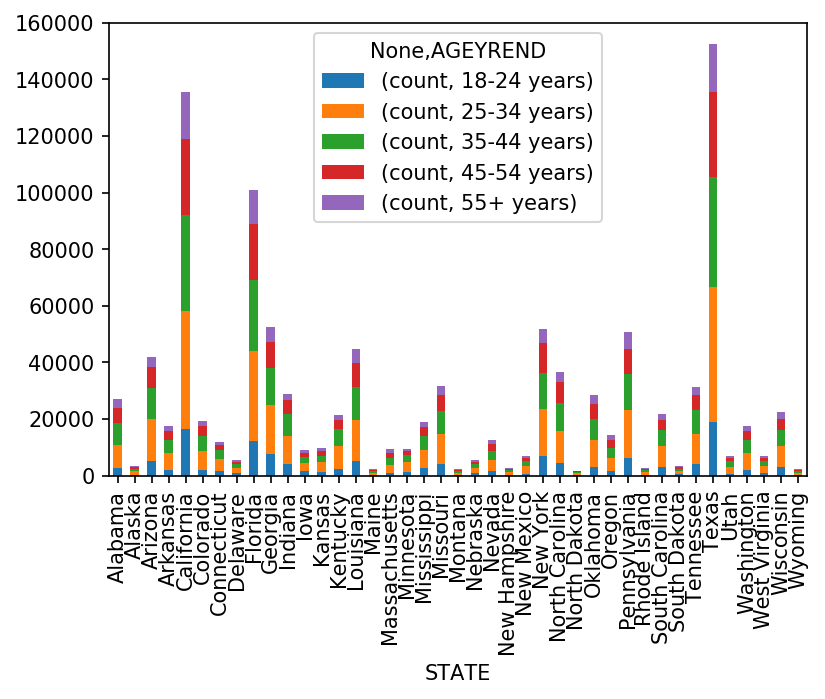

In [5]:
#df[['abuse','nff']].plot(kind='bar', stacked=True)
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*1.5
df = df.pivot(index = 'STATE', columns = 'AGEYREND')
df.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
#print(df.axes)
#(df.loc[:,('Massachusetts','Minnesota', "Connecticut")]).plot()
#plt.show()

In [ ]:
# just do percentage of total population that is over 55

In [11]:
combineddf['% 55+'] = combineddf["Total 55+"] / combineddf["Total"] * 100
display(combineddf.sort_values(by = ["% 55+"], ascending = False))

,STATE,Total,Total 55+,% 55+
20,Montana,2538,406,15.996848
16,Massachusetts,9375,1317,14.048000
23,New Hampshire,2749,382,13.895962
29,Oregon,14503,1757,12.114735
4,California,135401,16403,12.114386
40,Wyoming,2376,285,11.994949
22,Nevada,12771,1517,11.878475
8,Florida,100861,11907,11.805356
0,Alabama,27170,3109,11.442768
30,Pennsylvania,50618,5704,11.268719


In [39]:
massdf = df[df["AGEYREND"] == "55+ years"]
massdf = massdf[massdf["STATE"] == "Massachusetts"]

genderdf = pd.DataFrame({'Population': massdf.groupby( ["SEX"] ).size() }).reset_index()
print("2014 Mass. 55+ Prisoners by Gender")
genders = {1 : 'Male', 2: 'Female'}
genderdf = genderdf.replace({'SEX': genders})
display(genderdf)

offensedf = pd.DataFrame({'Population': massdf.groupby( ["OFFGENERAL"] ).size() }).reset_index()
print("2014 Mass. 55+ Prisoners by Offense")
offense = { 1 : 'Violent',  2 : 'Property',  3 : 'Drugs',  4 : 'Public order',  5 : 'Other/unspecified',  9 : 'Missing' }
offensedf = offensedf.replace({'OFFGENERAL' : offense})
display(offensedf)

offense_detail_df = pd.DataFrame({'Population': massdf.groupby( ["OFFDETAIL"] ).size() }).reset_index()
offense_detail = { 1 : 'Murder (including non-negligent manslaughter)', 2 : 'Negligent manslaughter', 3 : 'Rape/sexual assault', 4 : 'Robbery', 5 : 'Aggravated or simple assault', 6 : 'Other violent offenses', 7 : 'Burglary', 8 : 'Larceny', 9 : 'Motor vehicle theft', 10 : 'Fraud', 11 : 'Other property offenses', 12 : 'Drugs (includes possession, distribution, trafficking, other)', 13 : 'Public order', 14 : 'Other/unspecified', 99 : 'Missing'}
offense_detail_df = offense_detail_df.replace({"OFFDETAIL" : offense_detail})
print("2014 Mass. 55+ Prisoners by Offense (DETAILED)")
display(offense_detail_df)

admtypedf = pd.DataFrame({'Population': massdf.groupby( ["ADMTYPE"] ).size() }).reset_index()
admtype = { 1 : 'New court commitment', 2 : 'Parole return/revocation', 3 : 'Other admission (including unsentenced, transfer, AWOL/escapee return)', 9 : 'Missing' }
admtypedf = admtypedf.replace ({'ADMTYPE' : admtype})
print("2014 Mass. 55+ Prisoners by Admission Type")
display(admtypedf)

eddf = pd.DataFrame({'Population': massdf.groupby( ["EDUCATION"] ).size() }).reset_index()
ed = { 1 : '<HS diploma/GED', 2 : 'HS diploma/GED', 3 : 'Any college', 99 : 'Ungraded/unknown'}
eddf = eddf.replace({'EDUCATION' : ed})
print("2014 Mass. 55+ Prisoners by Education")
display(eddf)


sentlngthdf = pd.DataFrame({'Population': massdf.groupby( ["SENTLGTH"] ).size() }).reset_index()
sentlngth = { 0 : '< 1 year', 1 : '1-1.9 years', 2 : '2-4.9 years', 3 : '5-9.9 years', 4 : '10-24.9 years', 5 : '>=25 years', 6 : 'Life, LWOP, Life plus additional years, Death', 9 : 'Missing' }
sentlngthdf = sentlngthdf.replace({'SENTLGTH' : sentlngth})
print("2014 Mass. 55+ Prisoners by Sentence length")
display(sentlngthdf)

racedf = pd.DataFrame({'Population': massdf.groupby( ["RACE"] ).size() }).reset_index()
race = { 1 : 'White, non-Hispanic', 2 : 'Black, non-Hispanic', 3 : 'Hispanic, any race', 4 : 'Other race(s), non-Hispanic', 9 : 'Missing' }
racedf = racedf.replace({'RACE' : race})
print("2014 Mass. 55+ Prisoners by race")
display(racedf)

ageadmdf = pd.DataFrame({'Population': massdf.groupby( ["AGEADMIT"] ).size() }).reset_index()
ageadm = { 1 : '18-24 years', 2 : '25-34 years', 3 : '35-44 years', 4 : '45-54 years', 5 : '55+ years', 9 : 'Missing'}
ageadmdf = ageadmdf.replace({ "AGEADMIT" : ageadm})
print("2014 Mass. 55+ Prisoners by age at admission")
display(ageadmdf)

2014 Mass. 55+ Prisoners by Gender


,SEX,Population
0,Male,1286
1,Female,31


2014 Mass. 55+ Prisoners by Offense


,OFFGENERAL,Population
0,Violent,1081
1,Property,97
2,Drugs,84
3,Public order,50
4,Other/unspecified,5


2014 Mass. 55+ Prisoners by Offense (DETAILED)


,OFFDETAIL,Population
0,Murder (including non-negligent manslaughter),587
1,Negligent manslaughter,1
2,Rape/sexual assault,362
3,Robbery,95
4,Aggravated or simple assault,29
5,Other violent offenses,7
6,Burglary,58
7,Larceny,16
8,Motor vehicle theft,6
9,Fraud,5


2014 Mass. 55+ Prisoners by Admission Type


,ADMTYPE,Population
0,New court commitment,1195
1,Parole return/revocation,86
2,"Other admission (including unsentenced, transf...",36


2014 Mass. 55+ Prisoners by Education


,EDUCATION,Population
0,<HS diploma/GED,529
1,HS diploma/GED,651
2,Any college,67
3,9,70


2014 Mass. 55+ Prisoners by Sentence length


,SENTLGTH,Population
0,< 1 year,4
1,1-1.9 years,4
2,2-4.9 years,100
3,5-9.9 years,182
4,10-24.9 years,303
5,>=25 years,96
6,"Life, LWOP, Life plus additional years, Death",625
7,Missing,3


2014 Mass. 55+ Prisoners by race


,RACE,Population
0,"White, non-Hispanic",681
1,"Black, non-Hispanic",241
2,"Hispanic, any race",162
3,"Other race(s), non-Hispanic",30
4,Missing,203


2014 Mass. 55+ Prisoners by age at admission


,AGEADMIT,Population
0,18-24 years,71
1,25-34 years,169
2,35-44 years,226
3,45-54 years,426
4,55+ years,425


In [30]:
admyrdf = pd.DataFrame({'Population': massdf.groupby( ["ADMITYR"] ).size() }).reset_index()
print("2014 Mass. 55+ Prisoners by Admission Year")
display(admyrdf.sort_values(by = ["Population"], ascending = False))

release_year_df = pd.DataFrame({'Population': massdf.groupby( ["MAND_PRISREL_YEAR"] ).size() }).reset_index()
print("2014 Mass. 55+ Prisoners by Mandatory Release Year")
display(release_year_df.sort_values(by = ["Population"], ascending = False))

proj_release_year_df = pd.DataFrame({'Population': massdf.groupby( ["PROJ_PRISREL_YEAR"] ).size() }).reset_index()
print("2014 Mass. 55+ Prisoners by Projected Release Year")
display(proj_release_year_df.sort_values(by = ["Population"], ascending = False))

parol_elig_year_df = pd.DataFrame({'Population': massdf.groupby( ["PARELIG_YEAR"] ).size() }).reset_index()
print("2014 Mass. 55+ Prisoners by Parole Eligibility Year")
display(parol_elig_year_df.sort_values(by = ["Population"], ascending = False))

2014 Mass. 55+ Prisoners by Admission Year


,ADMITYR,Population
50,2014,126
49,2013,106
48,2012,92
47,2011,65
46,2010,62
45,2009,50
44,2008,46
41,2005,44
33,1997,36
43,2007,36


2014 Mass. 55+ Prisoners by Mandatory Release Year


,MAND_PRISREL_YEAR,Population
0,,631
4,2016,120
5,2017,107
6,2018,57
7,2019,56
3,2015,49
8,2020,45
9,2021,37
10,2022,32
11,2023,28


2014 Mass. 55+ Prisoners by Projected Release Year


,PROJ_PRISREL_YEAR,Population
0,,631
5,2016,120
6,2017,108
7,2018,57
8,2019,57
4,2015,52
9,2020,45
10,2021,37
11,2022,31
12,2023,29


2014 Mass. 55+ Prisoners by Parole Eligibility Year


,PARELIG_YEAR,Population
0,,333
37,2015,113
39,2017,86
38,2016,86
36,2014,72
40,2018,46
41,2019,39
42,2020,32
35,2013,31
34,2012,28
